# Problem Statement

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  
Data set - https://github.com/kimmi27789/DSData/blob/09301781d3046431d93ad35cafa1b919ac4a873d/Advertising.csv

# Importing Base Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#drop the unnamed column 0.. that doen't contain any useful info
df.drop(columns = 'Unnamed: 0',inplace = True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Disciptive Analysis

In [4]:
#lets first summarize the data
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

Description - 
- TV - this shows the sale from TV channels
- radio - this shows the sales from radio channels
- newpaper - shows the sales through newspaper
- sales - represents total sales

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Observation -
- There are total 3 Feature Variable and all are having Float Type Numerical data
- Target Variable (ie) sales is of Float type Numerical Data
- There are total 200 entries is this dataset
- total memory usage is - 6.4KB approx

In [6]:
df.describe(include='all')

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Above description is showing the count, mean, standard deviation, minimum and maximum value of each column. It is also showing how much data lies below the 25%, 50%, 75% respectively for each column

# Null Value Analysis

This analysis is to figure out if data contains any undefined or null value

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Observation - There is no null data in this dataset.

# Zero Value Analysis

In [8]:
(df==0).sum()

TV           0
radio        1
newspaper    0
sales        0
dtype: int64

Observation - radio sales as one entry as 0 value. which is ok..we don't need to treat it.

# Drop Duplicate Data

In [9]:
#lets drop the duplicate rows if any
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Observation - There was no duplicate data

# Interpreting Relationship between Features and Target Variable

In [10]:
#separating the Features and Target Variable
x = df.drop(columns = ['sales'])
y = df['sales']

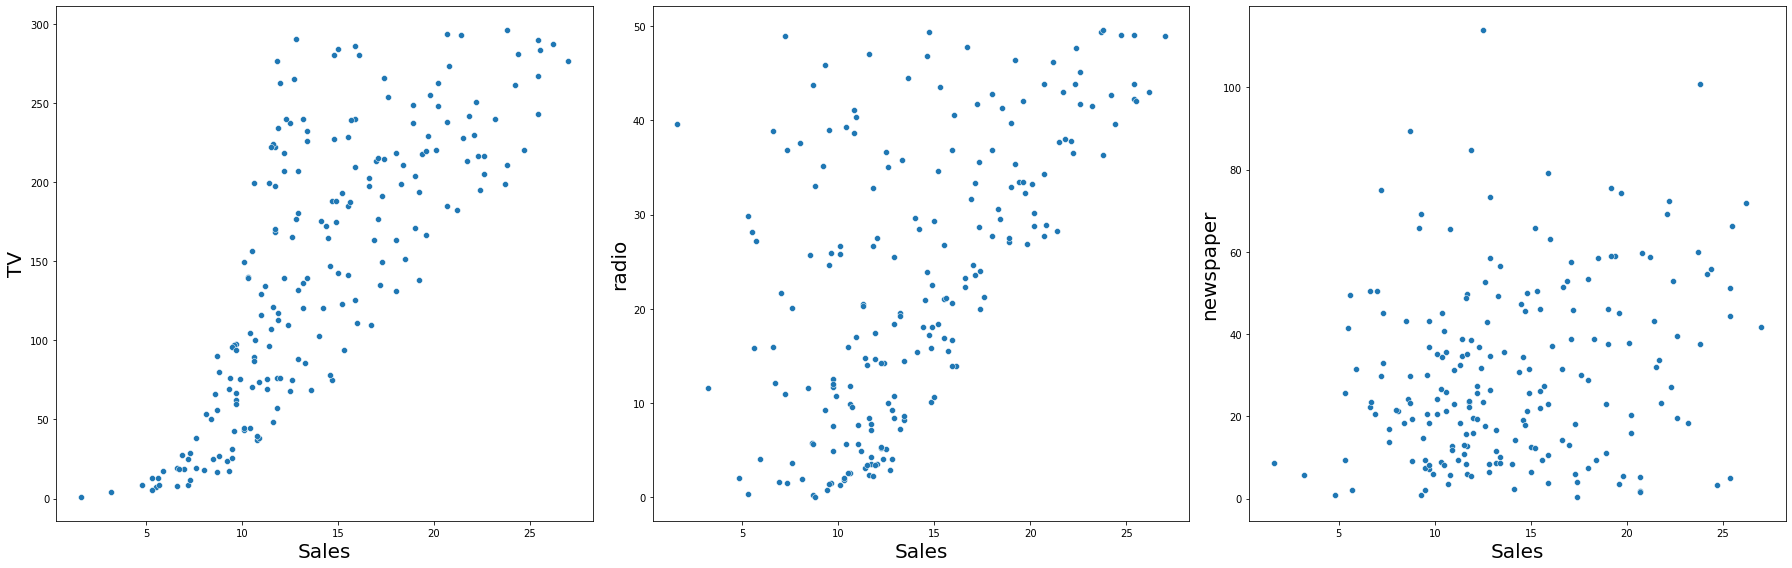

In [11]:
plt.figure(figsize=(25,8),facecolor='white')
plotnum=1
for col in x:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.scatterplot(y,x[col])
        plt.xlabel('Sales',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Observation - Sale is increasing linearly if the Tv or radio sale increases that means sales can increase by investing more in TV or Radio advertisements but investing more in newspaper advertisements will not raise the sale.

2) Comparing TV and Radio advertisements effect on Sales

<AxesSubplot:title={'center':'Comparision between TV and Radio'}, xlabel='TV', ylabel='radio'>

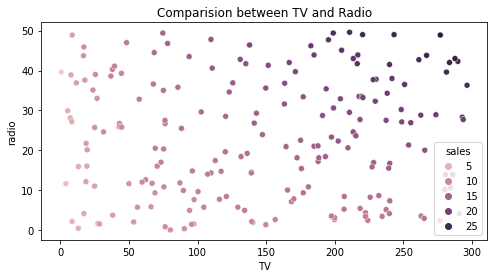

In [12]:
plt.figure(figsize=[8,4])
plt.title('Comparision between TV and Radio')
sns.scatterplot(x['TV'],x['radio'],hue=y)

Obsrvation - no direct relation found between TV and Radio sales, but As we can see from the plot, if we spend 5 to 15 dollars(say) then we dont get any sales from both TV and radio .But if we invest more then sales can rise.

3) Comparing TV and Newspaper based on Sales

<AxesSubplot:title={'center':'Comparision between TV and Newspaper'}, xlabel='TV', ylabel='newspaper'>

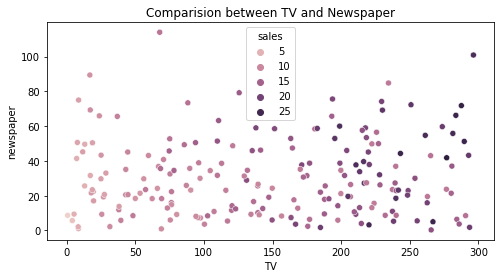

In [13]:
plt.figure(figsize=[8,4])
plt.title('Comparision between TV and Newspaper')
sns.scatterplot(x['TV'],x['newspaper'],hue=y)

Observation - As the investment on TV increases, sales increases but this is not the case for newspaper

4) Comparing Radio and Newspaper based on Sales

<AxesSubplot:title={'center':'Comparision between Radio and Newspaper'}, xlabel='radio', ylabel='newspaper'>

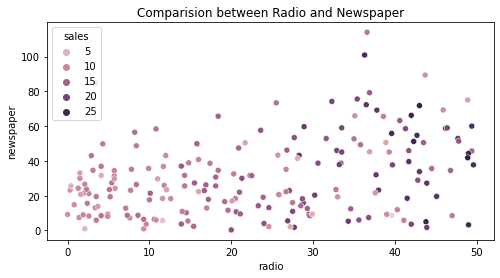

In [14]:
plt.figure(figsize=[8,4])
plt.title('Comparision between Radio and Newspaper')
sns.scatterplot(x['radio'],x['newspaper'],hue=y)

Observation - As the investment on Radio increases, sales increases but this is not the case for newspaper

# Visualizing all together

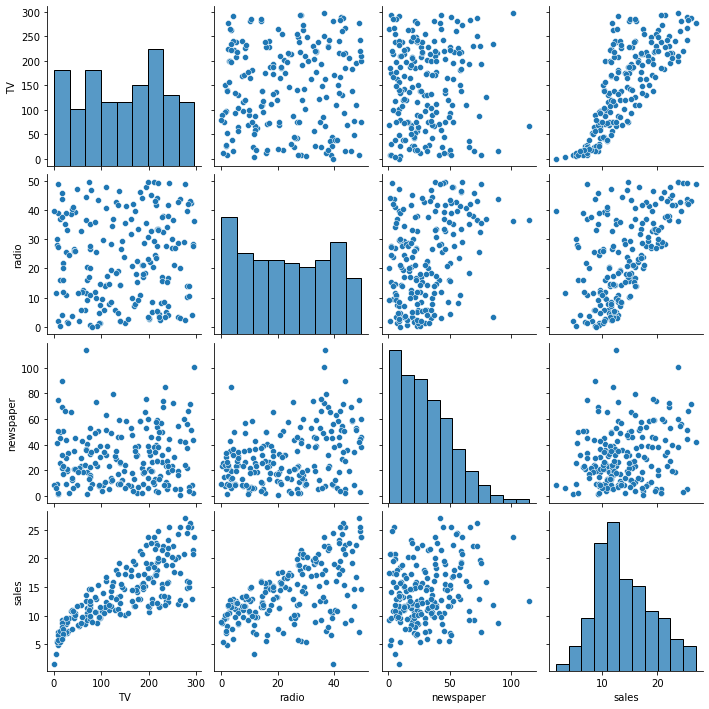

In [15]:
sns.pairplot(df)

Observation - There is some skewness observed

# Correlation

In [16]:
#lets find out the corelation between data
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

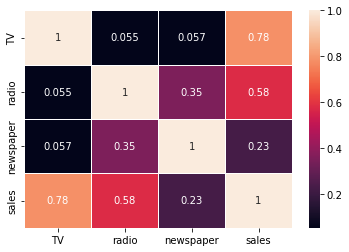

In [17]:
sns.heatmap(df.corr(), annot=True,linewidth=1)

Observation - Feature variables are not much correlated with each other. lets find out their bond with the target first.

In [18]:
#lets find out the correlation of Feature variables with target variable 
df.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

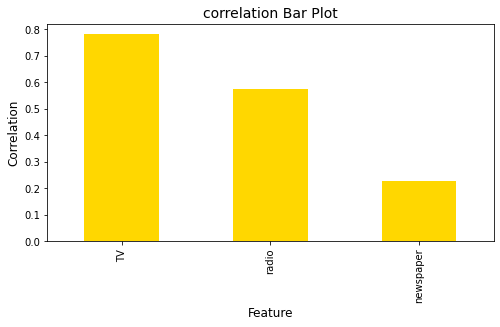

In [19]:
plt.figure(figsize=(8,4))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar' ,color='gold')
plt.xlabel('Feature' ,fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('correlation Bar Plot',fontsize=14)
plt.show()

Observation - 
- TV advertisement is highly correalted to sales 78% 
- Radio advertisement also have strong correlation with sales 57.6%
- Newpaper advertisement have 22% correaltion with sales which is not that strong but a good bond

# Detecting Multicollinearity with VIF and Data Cleaning

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()

#target variable not included
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

     feature       VIF
0         TV  2.486772
1      radio  3.285462
2  newspaper  3.055245


Observation - VIF values ranging between 1 and 5 are moderate. They represent a medium level of collinearity. Values of more than 5 are highly collinear.
We can see there is no multicollinearity issue

# Skewness

In [21]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Observation-
- The acceptable skewness range is +/- 0.5, newspaper has skewness present. lets test the presence of outliers.

# Shape of Distribution Curve

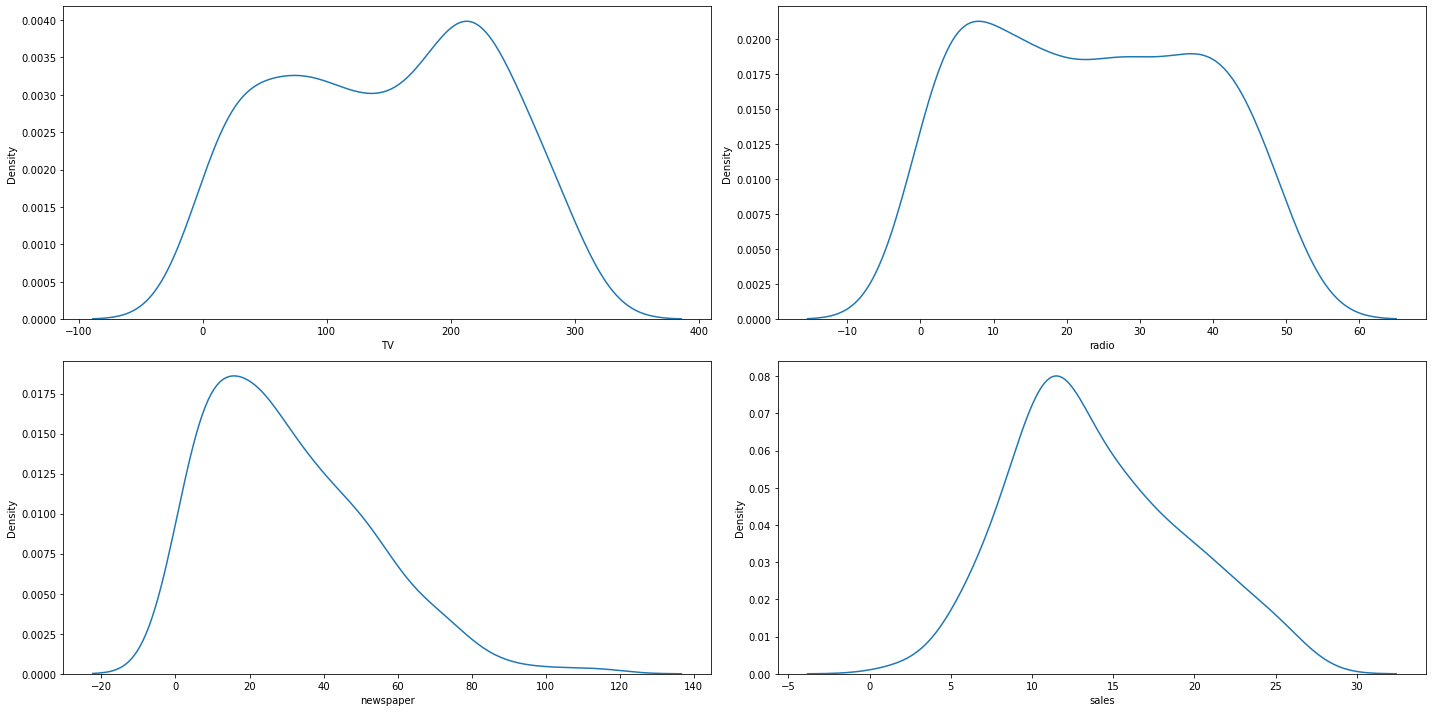

In [22]:
plt.figure(figsize=(20,10),facecolor='white')
plotnum=1
for col in df:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.kdeplot(data=df, x = col)
    plotnum+=1
plt.tight_layout()

# Checking for Outliers

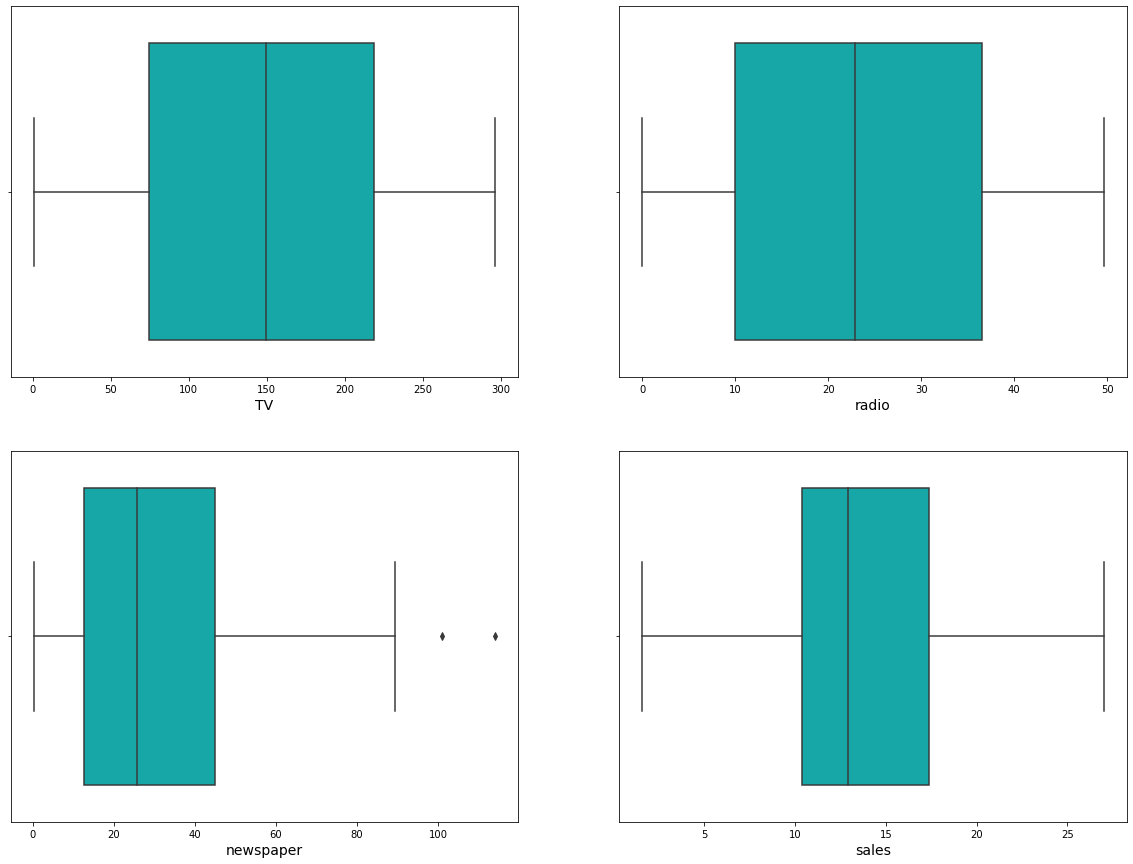

In [23]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.boxplot(df[col], color='c')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - Only Newspaper variable is having outliers.. lets treat them

# Removing Outliers using Z Score

In [24]:
#using z-score method
from scipy.stats import zscore #import zscore from scipy library
zscore(df)

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [25]:
z = np.abs(zscore(df))
z.shape

(200, 4)

In [26]:
np.where(z>3) #detecting outliers where z>3

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [27]:
z.iloc[16] #checking one of the detected outliers

TV           0.925305
radio        0.900494
newspaper    3.841171
sales        0.292541
Name: 16, dtype: float64

In [28]:
#checking total number of rows where z>3
len(np.where(z>3)[0])

2

In [29]:
#removing outliers

df_new = df[(z<3).all(axis=1)]

print("Old Data Frame:",df.shape)
print("New Data Frame:",df_new.shape)
print("Total Dropped Rows:",df.shape[0] - df_new.shape[0])

Old Data Frame: (200, 4)
New Data Frame: (198, 4)
Total Dropped Rows: 2


In [30]:
#percent loss
percent_loss = 2*100/200
print("Percent Loss: ",percent_loss)

Percent Loss:  1.0


There is a total 1% data loss which is acceptable.

In [31]:
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Checking Outliers again using boxplot

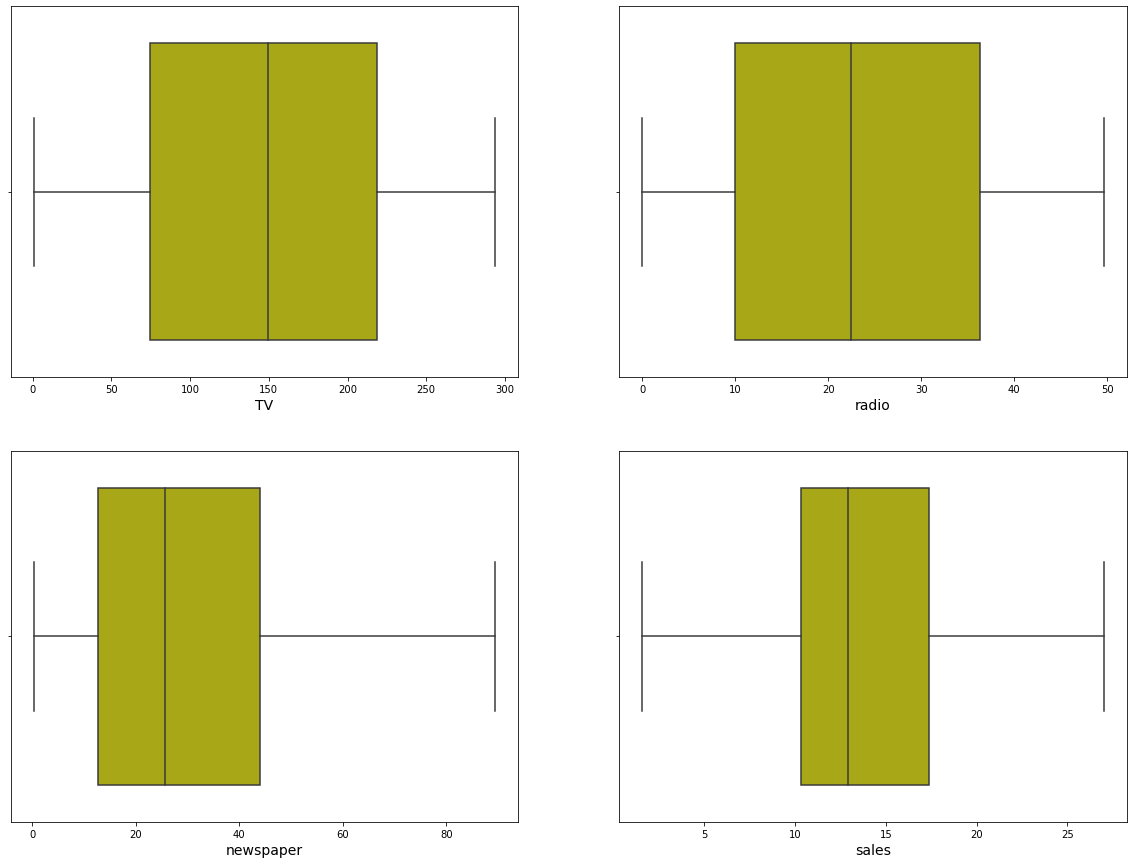

In [32]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df_new.columns:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.boxplot(df_new[col], color='y')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - No Outliers are present now

# Separating Dependent and Independent Variables

In [33]:
X = df_new.drop(columns = ['sales'])
Y = df_new['sales']

# Transforming data using Power Transform

In [34]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
type(X)

numpy.ndarray

In [35]:
X.ndim

2

In [36]:
X.mean()

6.878149378149117e-17

In [37]:
X.std()

1.0

Observation - mean = 0 and Standard deviation = 1, our feature variable are normalized now

# Feature Scaling using Standard Scaler

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X

,0,1,2
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622
...,...,...,...
193,-1.288311,-1.423941,-0.687435
194,-0.521579,-1.287689,-1.146090
195,0.416577,-0.862474,-1.314437
196,1.467535,1.182269,1.517395


In [39]:
X.shape

(198, 3)

# Model Building

I will train the follwoing models - 
- A. Linear Regression
- B. Random Forest Regressor
- C. Decision Tree Regressor
- D. K Neighbors Regressor
- E. SVR
- F. SGD Regressor

In [40]:
#Importing all Regression Algorithms

from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Finding best Random State

In [41]:
#Choosing the best random state for our ML Model
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    acc_test = r2_score(y_test,pred_test)
    
    if (acc_test > maxAccu):
        maxAccu = acc_test
        maxRS = i
print('Test Accuracy is max:',maxAccu,' at random_state:',maxRS)

Test Accuracy is max: 0.9473362332441401  at random_state: 90


Observation - test accuracy is best at random_state = 90

# Creating the Training and Testing data set

In [42]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=maxRS, test_size=0.20)

#creating models empty dataframe
models_df = pd.DataFrame()

# Machine Learning Model

In [43]:
def reg_func(model, X, Y, model_name,sc):    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    
    #accracy score
    rs = r2_score(y_test,pred)
    print('R2 Score :',rs)
    
    #cross validation score
    cvs = cross_val_score(model,X,Y,cv=4).mean()
    print('Cross validation score :',cvs)
    
    #difference in accuracy and cross validation score
    diff = abs(rs - cvs)
    print('R2 Score and CV Score Diff :', diff)  
    
    #mean square error
    mse = mean_squared_error(y_test, pred)
    print('Mean squared error:',mse)
    
    #mean absolute error
    mae = mean_absolute_error(y_test, pred)
    print('Mean Absolute error:',mae)
    
    #appending data to dataframe
    models_df[sc] = [model_name, rs, cvs, diff, mse, mae]
        
    plt.figure(figsize=(5,5))
    plt.scatter(x=y_test, y=pred, color='r')
    plt.plot(y_test,y_test, color='b')
    plt.xlabel('Actual Sales', fontsize = 14)
    plt.ylabel('Predicted Sales', fontsize = 14)
    plt.show()

# Linear Regression

R2 Score : 0.9473362332441401
Cross validation score : 0.8986654359289576
R2 Score and CV Score Diff : 0.048670797315182424
Mean squared error: 1.5876335108822075
Mean Absolute error: 1.0276646765306128


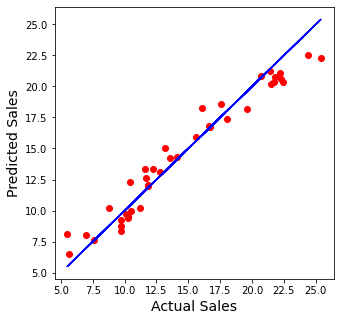

In [44]:
reg_func(LinearRegression(),X,Y, 'LinearRegression','lr')

# B. Random Forest Regressor

R2 Score : 0.9818663638685623
Cross validation score : 0.9762992415815595
R2 Score and CV Score Diff : 0.005567122287002846
Mean squared error: 0.5466674749999998
Mean Absolute error: 0.622425


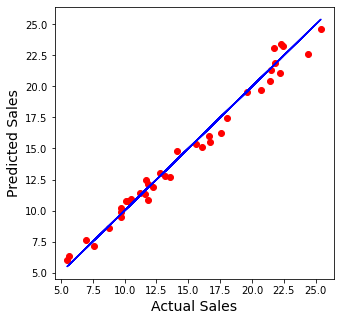

In [45]:
reg_func(RandomForestRegressor(),X,Y, 'RandomForestRegressor','rfr')

# C. Decision Tree Regressor

R2 Score : 0.9734713035632543
Cross validation score : 0.9369672165302003
R2 Score and CV Score Diff : 0.03650408703305397
Mean squared error: 0.7997499999999996
Mean Absolute error: 0.6924999999999999


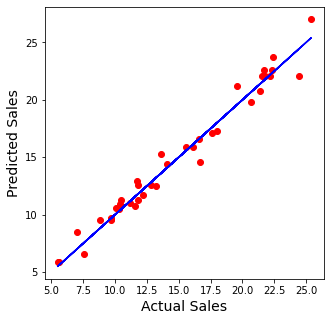

In [46]:
reg_func(DecisionTreeRegressor(),X,Y, 'DecisionTreeRegressor','dtr')

# D. K Neighbors Regressor

R2 Score : 0.9258065586168922
Cross validation score : 0.9435803080268838
R2 Score and CV Score Diff : 0.017773749409991546
Mean squared error: 2.236679999999999
Mean Absolute error: 1.0380000000000003


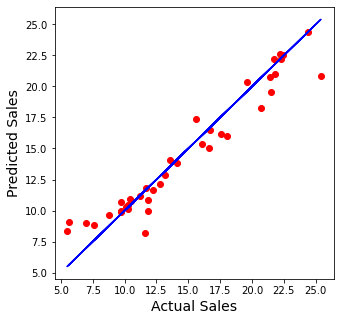

In [47]:
reg_func(KNN(),X,Y, 'KNN','knn')

# E. SVR

R2 Score : 0.924653899613438
Cross validation score : 0.9135257569293862
R2 Score and CV Score Diff : 0.011128142684051823
Mean squared error: 2.271428749913529
Mean Absolute error: 0.9454888804931094


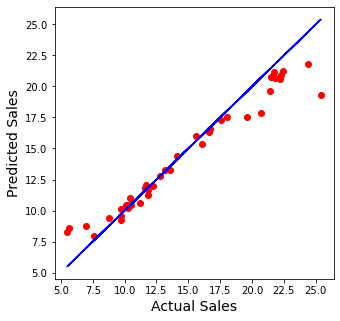

In [48]:
reg_func(SVR(),X,Y, 'SVR','svr')

# F. SGD Regressor

R2 Score : 0.9462690944687842
Cross validation score : 0.8991238307720262
R2 Score and CV Score Diff : 0.04714526369675798
Mean squared error: 1.6198041166873505
Mean Absolute error: 1.0297429661749935


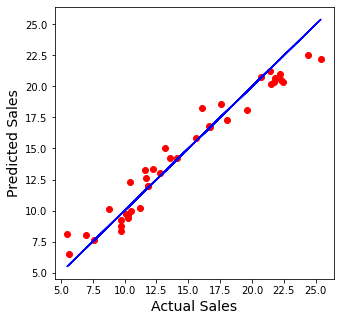

In [49]:
reg_func(SGDRegressor(),X,Y, 'SGDRegressor','sgd')

In [50]:
model_stats = models_df.transpose()
model_stats

,0,1,2,3,4,5
lr,LinearRegression,0.947336,0.898665,0.048671,1.587634,1.027665
rfr,RandomForestRegressor,0.981866,0.976299,0.005567,0.546667,0.622425
dtr,DecisionTreeRegressor,0.973471,0.936967,0.036504,0.79975,0.6925
knn,KNN,0.925807,0.94358,0.017774,2.23668,1.038
svr,SVR,0.924654,0.913526,0.011128,2.271429,0.945489
sgd,SGDRegressor,0.946269,0.899124,0.047145,1.619804,1.029743


In [51]:
model_stats.columns = ['Model','R2 Score', 'Cross Validation Score', 'Difference','Mean Sq Error','Mean Abs Error']
model_stats

,Model,R2 Score,Cross Validation Score,Difference,Mean Sq Error,Mean Abs Error
lr,LinearRegression,0.947336,0.898665,0.048671,1.587634,1.027665
rfr,RandomForestRegressor,0.981866,0.976299,0.005567,0.546667,0.622425
dtr,DecisionTreeRegressor,0.973471,0.936967,0.036504,0.79975,0.6925
knn,KNN,0.925807,0.94358,0.017774,2.23668,1.038
svr,SVR,0.924654,0.913526,0.011128,2.271429,0.945489
sgd,SGDRegressor,0.946269,0.899124,0.047145,1.619804,1.029743


# Visualizing R2 Score for all Models

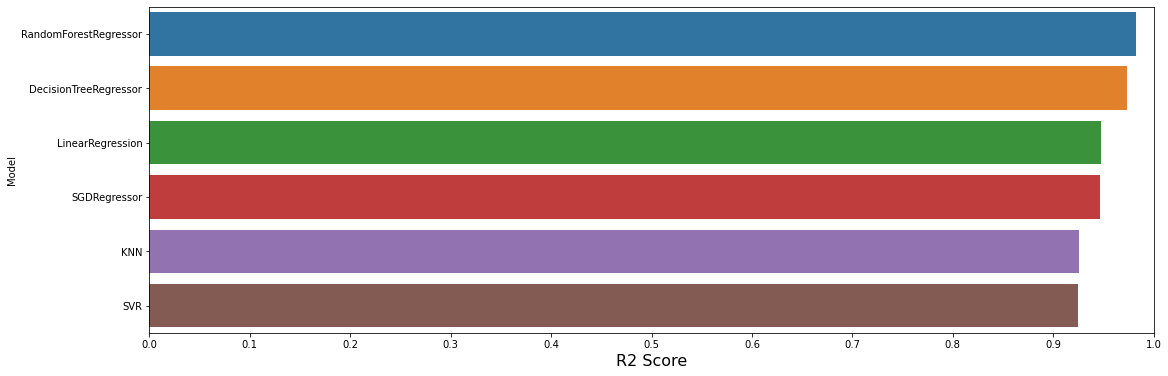

In [52]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['R2 Score'], ascending=False, inplace=True)

sns.barplot(x='R2 Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest Regressor is giving the highest R2 Score = 97.8%

# Visualizing Cross Validation Score for all Models

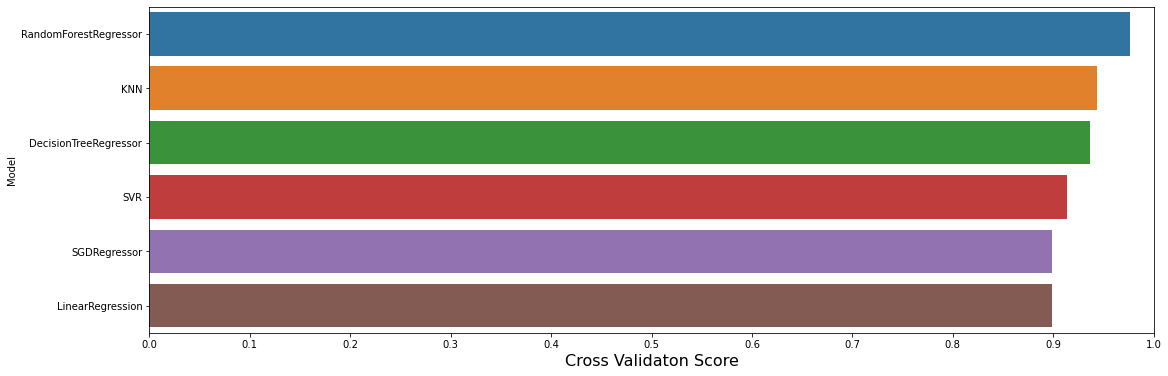

In [53]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Cross Validation Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validation Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Cross Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest Regressor is giving the highest Cross Validation Score = 97.6%

# Visualizing Mean Square Error for all Models

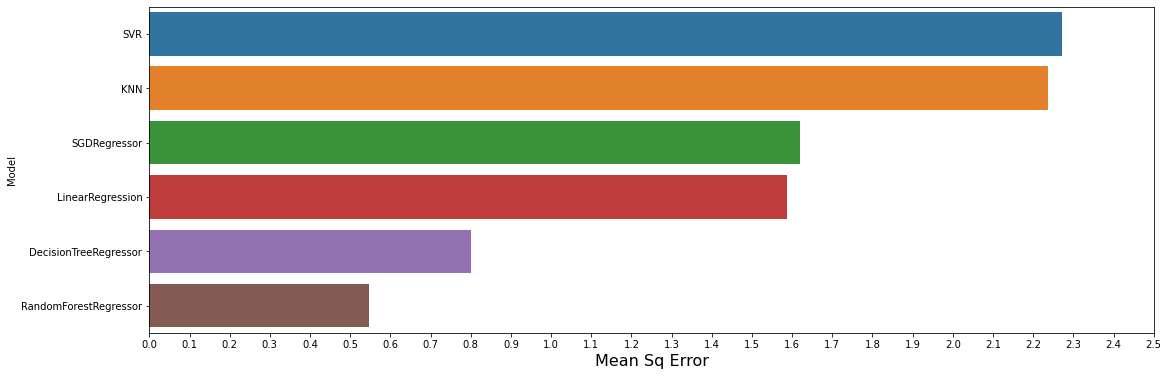

In [54]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Mean Sq Error'], ascending=False, inplace=True)

sns.barplot(x='Mean Sq Error', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Mean Sq Error', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,2.5)
axe.set_xticks(np.arange(0, 2.6, 0.1))
plt.show()

Observation - Random Forest Regressor is giving the Lease Mean Sq Error. Hence we choose Random Forest Regressor as the best Regressor method to train our model.

# Hyper Parameter Tuning with Random Forest Regressor

In [58]:
from sklearn.model_selection import GridSearchCV
parameters = { 'max_features': ['auto', 'sqrt'], 'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)], 'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]}
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}

R2 Score : 0.9817554627343238
Cross validation score : 0.977011414477806
R2 Score and CV Score Diff : 0.004744048256517752
Mean squared error: 0.5500107671334331
Mean Absolute error: 0.6254616071428574


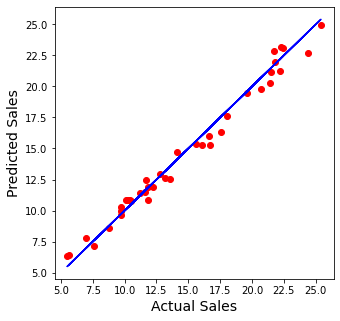

In [59]:
GCV.best_estimator_
rfr = RandomForestRegressor( max_depth = 10, max_features = 'auto', n_estimators = 200) 
reg_func(rfr, X, Y,'RandomForestRegressor','rfr')

Observation - Random Forest regressor with hyper parameter tuning is giving 98% accuracy which is a good score.

# Saving the Model

In [60]:
import pickle
filename = 'sales_channel_prediction.pkl'
pickle.dump(rfr,open(filename,'wb'))

# Conclusion

In [61]:
loaded_model = pickle.load(open('sales_channel_prediction.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

98.17554627343237


In [62]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,17.621667,6.435,23.143167,19.455667,15.989789,21.210179,21.181667,12.62475,23.132167,8.5685,...,12.9105,10.8089,16.345167,6.3645,9.939917,11.918,9.636,12.427042,15.242,15.2605
Original,18.000000,5.600,22.300000,19.600000,16.600000,22.200000,21.500000,13.20000,22.400000,8.8000,...,12.8000,10.5000,17.600000,5.5000,9.700000,11.800,9.700,11.700000,16.700,16.1000


# This model is 98.17% accurate